# Project 2 K-NN, PCA, and Clustering

### Name - Mahvash Maghrabi

## Importing the necessary libraries

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering



## Plotting Set A and Set B

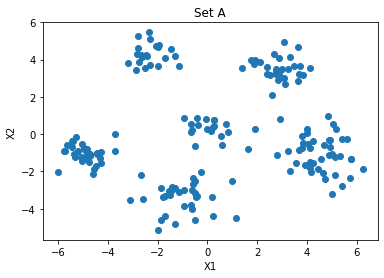

In [147]:
# Loading the set A dataset into a pandas dataframe
A = pd.read_csv('/Users/mahvashmaghrabi/Downloads/clusterDataA-1.csv')

# Plotting the X1 and X2 features of the set A data 
plt.scatter(A['X1'], A['X2'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Set A')
plt.show()


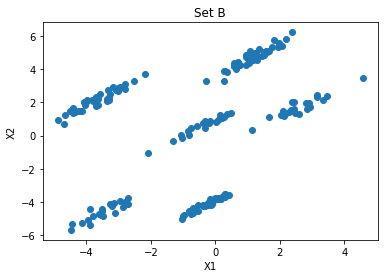

In [148]:
# Loading the set B dataset into a pandas dataframe
B = pd.read_csv('/Users/mahvashmaghrabi/Downloads/clusterDataB-1.csv')

# Plotting the X1 and X2 features of the set B data 
plt.scatter(B['X1'], B['X2'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Set B')
plt.show()

## K-Means Clustering

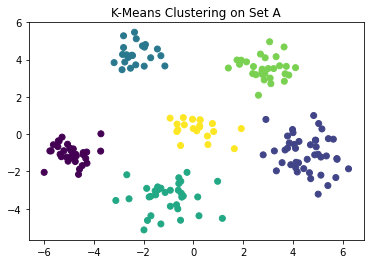

In [150]:
# Loading the set A dataset into a pandas dataframe
A = pd.read_csv('/Users/mahvashmaghrabi/Downloads/clusterDataA-1.csv')

#k-means clustering value of K=6
kmeans = KMeans(n_clusters=6)
kmeans.fit(A)
labels = kmeans.labels_

# Plotting the clusters
plt.scatter(A["X1"], A["X2"], c=labels)
plt.title("K-Means Clustering on Set A")
plt.show()



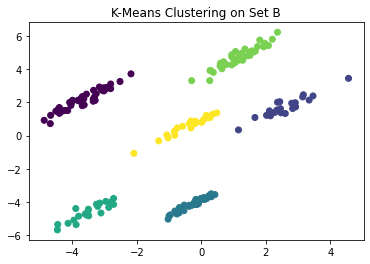

In [151]:
# Loading the set B dataset into a pandas dataframe
B = pd.read_csv('/Users/mahvashmaghrabi/Downloads/clusterDataB-1.csv')

#k-means clustering value of K=6
kmeans = KMeans(n_clusters=6)
kmeans.fit(B)
labels = kmeans.labels_

# Plotting the clusters
plt.scatter(B["X1"], B["X2"], c=labels)
plt.title("K-Means Clustering on Set B")
plt.show()

## DBSCAN

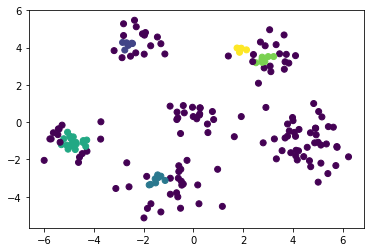

In [152]:
# Loading the set A dataset into a pandas dataframe
A = pd.read_csv('/Users/mahvashmaghrabi/Downloads/clusterDataA-1.csv')

db = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(A)

# Plotting the clusters
plt.scatter(A["X1"], A["X2"], c=labels)
plt.show()


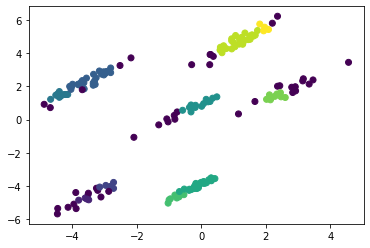

In [153]:
# Loading the set B dataset into a pandas dataframe
B = pd.read_csv('/Users/mahvashmaghrabi/Downloads/clusterDataB-1.csv')

db = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(B)

# Plotting the clusters
plt.scatter(B["X1"], B["X2"], c=labels)
plt.show()


## Comparison using different numbers of clusters

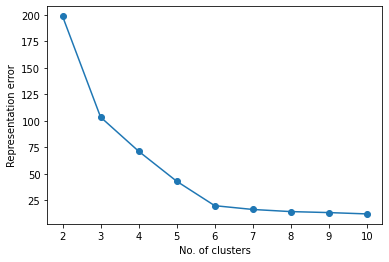

In [157]:
# Loading the set A dataset into a pandas dataframe
data = pd.read_csv('/Users/mahvashmaghrabi/Downloads/clusterDataA-1.csv')

# X1 and X2 features
setA = data[['X1', 'X2']].values

# Standardize
scaler = StandardScaler()
A_stndrd = scaler.fit_transform(setA)

# List that stores representation errors
representation_errors = []

# K-means clustering for value of K from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(A_stndrd)
    
# Distances of each point from the closest cluster mean
    dist = kmeans.transform(A_stndrd)
    
# Sum-squared error of the distances
    error = np.sum(np.min(dist, axis=1)**2)
    
# Adiing the error to the representation list
    representation_errors.append(error)

# Plotting the representation errors
plt.plot(range(2, 11), representation_errors, marker='o')
plt.xlabel("No. of clusters")
plt.ylabel("Representation error")
plt.show()

## Ray and Turi 

In [200]:
def rt(dataset, labels, n_clusters):

    n_samples, n_features = X.shape
    barycntr = np.zeros((n_clusters, n_features))
    for i in range(n_clusters):
        barycntr[i] = np.mean(X[labels == i], axis=0)
    numerator = 0
    for i in range(n_clusters):
        numerator += np.sum((X[labels == i] - barycenters[i]) ** 2)
    n = n_samples
    d = np.min(cdist(barycntr, barycntr) ** 2)
    c = n / d
    return c

## Silhouette Scores

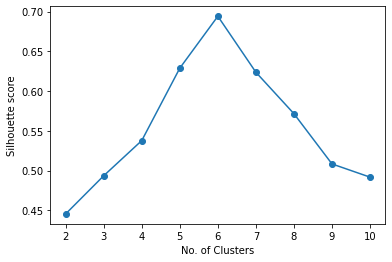

In [163]:
silhouetteScores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(features)
    silhouetteScores.append(silhouette_score(features, labels))

# Plot the silhouette score for each value of K
plt.plot(range(2, 11), silhouetteScores, marker='o')
plt.xlabel("No. of Clusters")
plt.ylabel("Silhouette score")
plt.show()


## Davies Bouldin Indexes - Extension

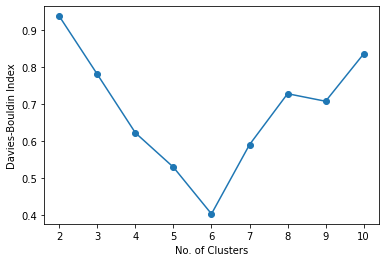

In [164]:
DBI = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(features)
    DBI.append(davies_bouldin_score(features, labels))

# Plotting
plt.plot(range(2, 11), DBI, marker='o')
plt.xlabel("No. of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.show()

## Principal Component Analysis

In [165]:
# Principal Components Analysis
def pca(data, normalize=False):
# Converting data
    x = data.values
# Computing mean values of columns
    mn = np.mean(x, axis=0)
# Computing difference matrix
    diff = x - mn
# Computing standard deviations of columns
    if normalize:
        sd = np.std(x, axis=0)
        diff = (x - mn) / sd
# Covariance matrix for whitened data
        cov_m = np.dot(diff.T, diff) / (x.shape[0])
    else:
        sd = np.ones(x.shape[1])
        diff = x - mn
# Covariance matrix for non-whitened data
        cov_m = np.dot(diff.T, diff) / (x.shape[0]-1)

# Normalize
    diff = diff / sd

# Compute singular value decomposition of diff
# U is for the left singular vectors
# The matrix S is for the singular values
# The matrix V is for  the right singular vectors
    U, S, V = np.linalg.svd(diff, full_matrices=False)

# Eigenvalues of covariance matrix
    eigenvalues = S**2 / (x.shape[0] - 1)

# Projected data
    projected_data = np.dot(diff, V.T)

# New dataframe for projected data
    projected_data = pd.DataFrame(projected_data, columns=data.columns)

# Return means, standard deviations, eigenvalues, eigenvectors,projected data and covariance matrix
    return mn, sd, eigenvalues, V, projected_data, cov_m

## PCA on Set A and Set B

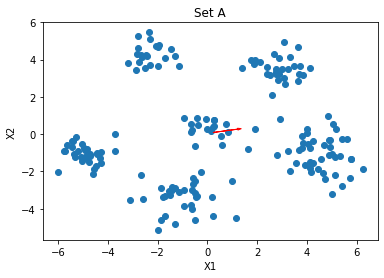

In [166]:
# Loading the set A dataset into a pandas dataframe
setA = pd.read_csv("/Users/mahvashmaghrabi/Downloads/clusterDataA-1.csv")

# X1 and X2 features
setA = setA[["X1", "X2"]]

# PCA on the set A dataset
mn, sd, eigenvalues, V, projected_data1, cov_m = pca(setA)

# Plotting the eigenvector
plt.scatter(data["X1"], data["X2"])
plt.arrow(mn[0], mn[1], V[0][0]*sd[0], V[0][1]*sd[1], color='red', head_width=0.1)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Set A")
plt.show()


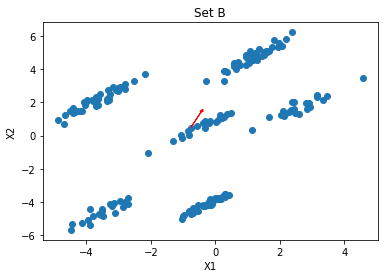

In [167]:
# Loading the set B dataset into a pandas dataframe
setB = pd.read_csv("/Users/mahvashmaghrabi/Downloads/clusterDataB-1.csv")

# X1 and X2 features
setB = setB[["X1", "X2"]]

# PCA on the set A dataset
mn, sd, eigenvalues, V, projected_data2, cov_m = pca(setB)

# Plotting the eigenvector
plt.scatter(setB["X1"], setB["X2"])
plt.arrow(mn[0], mn[1], V[0][0]*sd[0], V[0][1]*sd[1], color='red', head_width=0.1)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Set B")
plt.show()


## Reclustering on the projected data

## K-Means on Projected Data

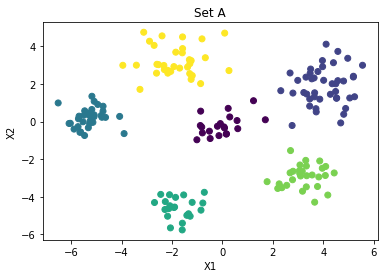

In [168]:
# K-means clustering algorithm on projected data for set A
kmeans = KMeans(n_clusters=6, random_state=0).fit(projected_data1)
labels = kmeans.labels_

# Plotting the clusters
plt.scatter(projected_data1["X1"], projected_data1["X2"], c=labels, cmap='viridis')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Set A")
plt.show()


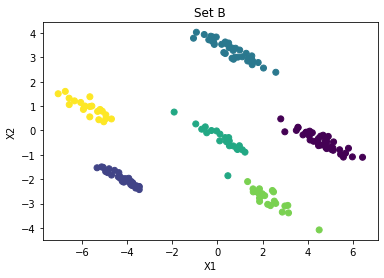

In [169]:
# K-means clustering algorithm on projected data for set B
kmeans = KMeans(n_clusters=6, random_state=0).fit(projected_data2)
labels = kmeans.labels_

# Plotting the clusters obtained from K-means
plt.scatter(projected_data2["X1"], projected_data2["X2"], c=labels, cmap='viridis')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Set B")
plt.show()

## DBSCAN on projected data

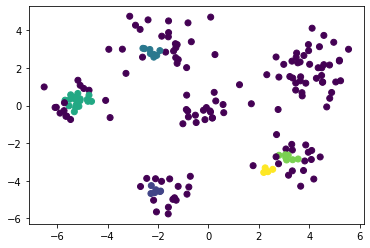

In [170]:
db = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(projected_data1)

# Plotting
plt.scatter(projected_data1["X1"], projected_data1["X2"], c=labels)
plt.show()


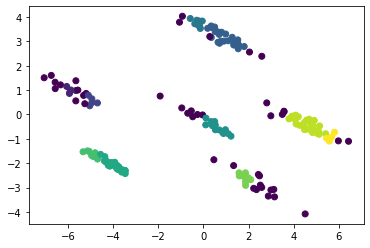

In [171]:
db = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(projected_data2)

# Plotting
plt.scatter(projected_data2["X1"], projected_data2["X2"], c=labels)
plt.show()


## Agglomerative Clustering - Extension

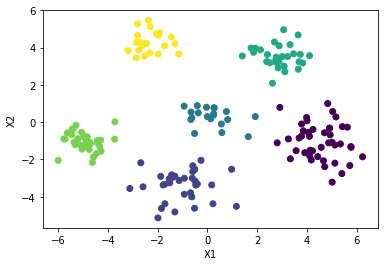

In [173]:
# Loading the set B dataset into a pandas dataframe
A = pd.read_csv('/Users/mahvashmaghrabi/Downloads/clusterDataA-1.csv')

hierarchical = AgglomerativeClustering(n_clusters=6).fit(A)
labels = hierarchical.labels_

# Plotting the clusters
plt.scatter(A["X1"], A["X2"], c=labels, cmap='viridis')
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


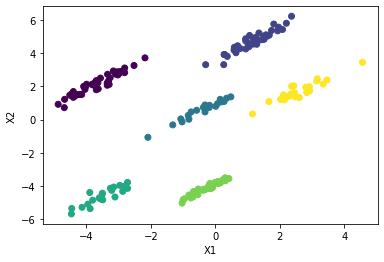

In [174]:
# Loading the set B dataset into a pandas dataframe
B = pd.read_csv('/Users/mahvashmaghrabi/Downloads/clusterDataB-1.csv')

hierarchical = AgglomerativeClustering(n_clusters=6).fit(B)
labels = hierarchical.labels_

# Plotting the clusters
plt.scatter(B["X1"], B["X2"], c=labels, cmap='viridis')
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

## Task 3 - Apply K-Means Clustering on the Music dataset

In [175]:
# Loading the already cleaned music dataset into a pandas dataframe
music = pd.read_csv("/Users/mahvashmaghrabi/Downloads/survey_data_cleaned_all_MH.csv")

In [176]:
music.head()

,Index,Age,Hours per day,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
0,1,18,3.0,1,0,1,2,0,3,1,0,3,2,3,0,2,3.0,0.0,1.0,0.0
1,2,63,1.5,2,0,0,1,3,1,1,0,2,2,1,3,1,7.0,2.0,2.0,1.0
2,3,18,4.0,0,0,3,1,1,3,2,2,1,0,1,1,3,7.0,7.0,10.0,2.0
3,4,61,2.5,2,0,0,0,3,2,2,0,2,2,0,0,0,9.0,7.0,3.0,3.0
4,5,18,4.0,0,0,1,3,0,3,2,0,2,3,3,0,1,7.0,2.0,5.0,9.0


In [177]:
# Checking the unique columns
for col in music.columns:
    print(col)
    

Index
Age
Hours per day
Frequency [Classical]
Frequency [Country]
Frequency [EDM]
Frequency [Hip hop]
Frequency [Jazz]
Frequency [K pop]
Frequency [Lofi]
Frequency [Metal]
Frequency [Pop]
Frequency [R&B]
Frequency [Rap]
Frequency [Rock]
Frequency [Video game music]
Anxiety
Depression
Insomnia
OCD


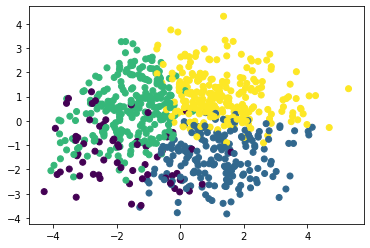

In [178]:
# Loading the music dataset into a pandas dataframe 
music = pd.read_csv("/Users/mahvashmaghrabi/Downloads/survey_data_cleaned_all_MH.csv")

# Dropping the index columns as it is not required for k-means clustering
musicDataset = music.drop(columns=['Index'], axis=1).values

# Standardize
scaler = StandardScaler()
music_stndrd = scaler.fit_transform(musicDataset)

# Perform k-means clustering with value of K=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(music_stndrd)
labels = kmeans.labels_

# sklearn built in PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()


## Silhouette Scores

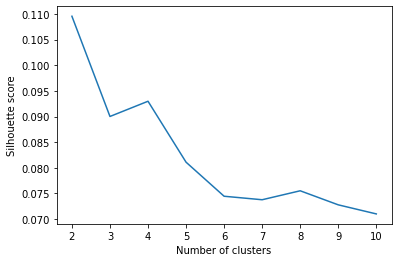

In [180]:
# silhouette scores for values of k ranging from 2 to 11
silhouetteScores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouetteScores.append(silhouette_score(X_scaled, labels))
    
# Plot the silhouette scores
plt.plot(range(2, 11), silhouetteScores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()
